In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import roc_curve,auc

In [2]:
dataset = pd.read_csv("./dataset.csv")

In [3]:
dataset.head() #first 5 rows of dataset

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
dataset.tail() # last 5 rows of dataset

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [7]:
dataset.shape # rows and columns present in dataset

(1885, 32)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Cocain  

In [9]:
dataset.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [57]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

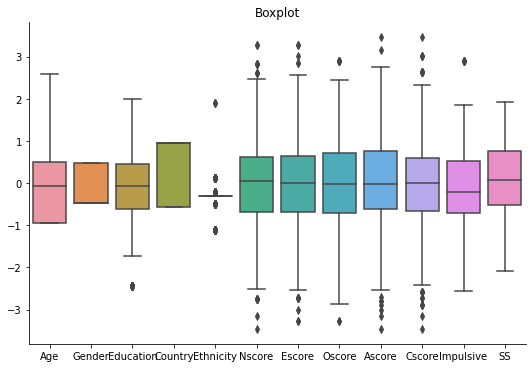

In [23]:
sns.catplot(data=dataset[features], kind="box", aspect=1.5)
plt.title("Boxplot")
plt.show()

In [11]:
dataset.corr()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
ID,1.000000,-0.271395,-0.025467,-0.025253,-0.340751,0.059309,0.018639,-0.046960,0.173565,-0.028782,-0.072094,0.119663,0.165882
Age,-0.271395,1.000000,0.110286,0.158811,0.354241,-0.069753,-0.136654,-0.033849,-0.226778,0.063504,0.183564,-0.190939,-0.332188
Gender,-0.025467,0.110286,1.000000,0.196774,0.216271,-0.001213,0.074646,0.057864,-0.131021,0.219743,0.183831,-0.167492,-0.244277
Education,-0.025253,0.158811,0.196774,1.000000,0.225311,-0.036099,-0.100993,0.115645,0.057994,0.091088,0.240417,-0.132482,-0.131146
Country,-0.340751,0.354241,0.216271,0.225311,1.000000,-0.127946,-0.136191,0.109524,-0.341969,0.150921,0.214000,-0.231572,-0.345415
Ethnicity,0.059309,-0.069753,-0.001213,-0.036099,-0.127946,1.000000,0.047642,0.018402,0.084816,-0.038726,-0.029923,0.082411,0.100304
Nscore,0.018639,-0.136654,0.074646,-0.100993,-0.136191,0.047642,1.000000,-0.431051,0.010177,-0.216964,-0.391088,0.174399,0.079988
Escore,-0.046960,-0.033849,0.057864,0.115645,0.109524,0.018402,-0.431051,1.000000,0.245277,0.157336,0.308024,0.114151,0.210130
Oscore,0.173565,-0.226778,-0.131021,0.057994,-0.341969,0.084816,0.010177,0.245277,1.000000,0.038516,-0.056811,0.277512,0.421709
Ascore,-0.028782,0.063504,0.219743,0.091088,0.150921,-0.038726,-0.216964,0.157336,0.038516,1.000000,0.247482,-0.229690,-0.208061


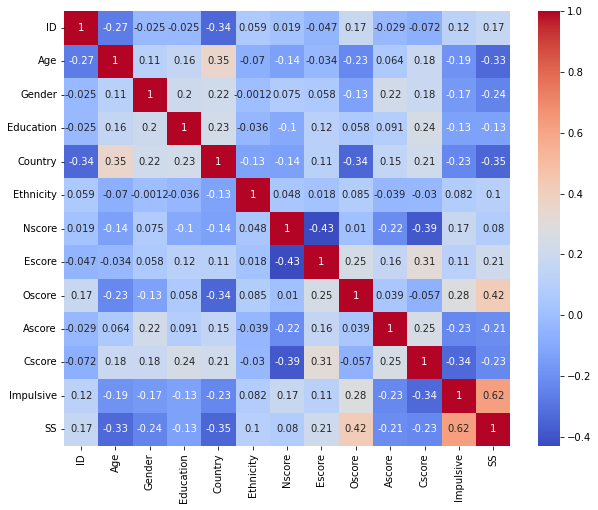

In [40]:
heatmap = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap, annot=True, cmap='coolwarm')
plt.show()

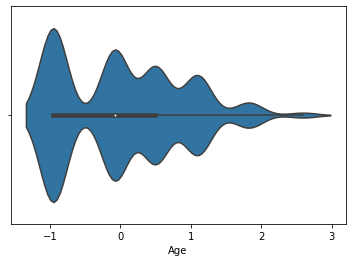

In [65]:
violinplot = dataset['Age']
fig, ax = pyplot.subplots(figsize =(6, 4))
ax=sns.violinplot(violinplot)
plt.show()

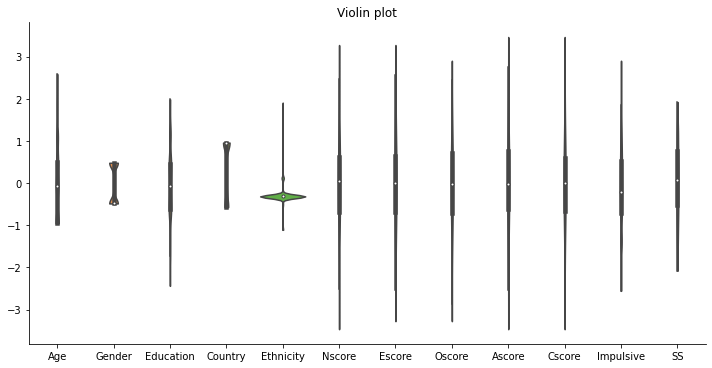

In [71]:
sns.catplot(data=dataset[features], kind="violin", bw=.25, cut=0, split=True, aspect = 2)
plt.title("Violin plot")
plt.show()